Elaborar un modelo predictivo aplicando técnicas de Agrupamiento
Jerárquico utilizando lenguaje Python para resolver un problema de
clusterización.

● Para la siguiente clasificación construya un dendrograma, con distintas
métricas.
● Establesca el k adecuado para estos datos.
● Tome la decisión por medio de “índices silhouette”

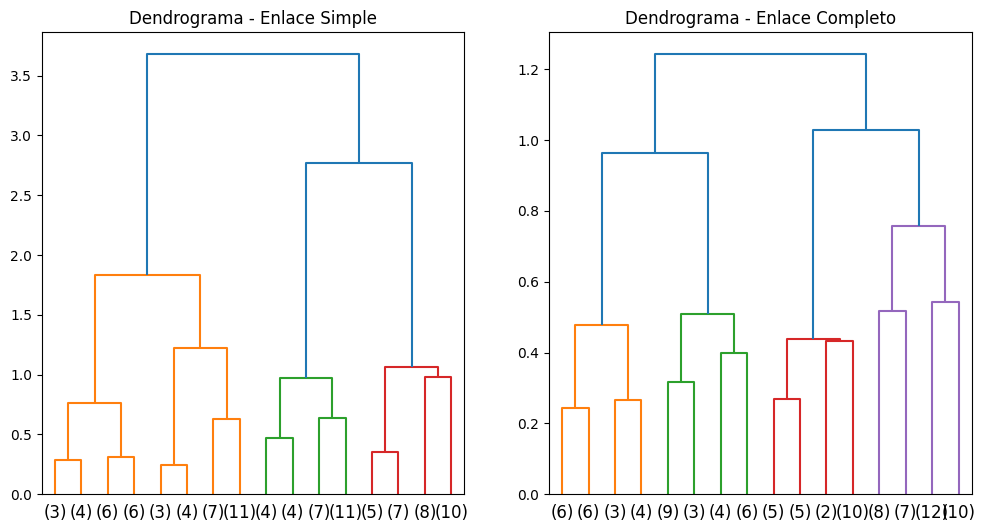

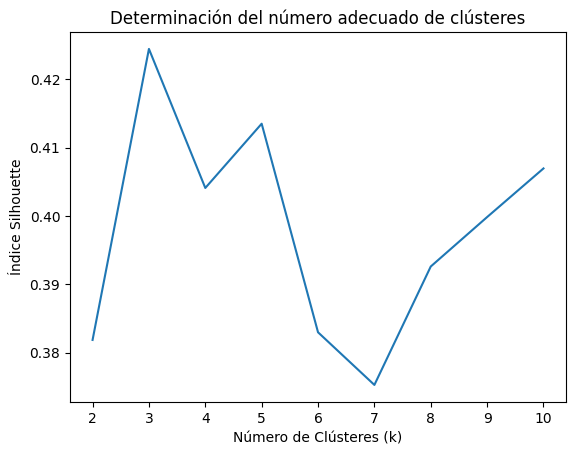

Número óptimo de clústeres: 3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Empleamos la función para graficar el dendrograma
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)

# Datos simulados
X = np.random.rand(100, 2)

# 1. Construimos el dendrograma con distintas métricas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
model_single = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)
plt.title('Dendrograma - Enlace Simple')
plot_dendrogram(model_single, truncate_mode='level', p=3)

plt.subplot(1, 2, 2)
model_complete = AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=0).fit(X)
plt.title('Dendrograma - Enlace Completo')
plot_dendrogram(model_complete, truncate_mode='level', p=3)
plt.show()

# 3. Establecemos el k adecuado para los datos
# Observamos el dendrograma y determinamos un punto de corte que sea apropiado

# 4. Tomamos la decisión por medio de "índices silhouette"
silhouette_scores = []
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Graficamos el índice silhouette en función de k
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Índice Silhouette')
plt.title('Determinación del número adecuado de clústeres')
plt.show()

# Elegimos el número óptimo de clústeres basado en el índice silhouette
k_optimo = silhouette_scores.index(max(silhouette_scores)) + 2

print("Número óptimo de clústeres:", k_optimo)